### 4.1  What is a Decision Tree?

#### A Nonparametric Machine Learning Algorithm

So far we’ve been dealing with Logistic Regression. In Logistic Regression, we look at the data graphically and draw a line to separate the data. The model is defined by the coefficients that define the line. These coefficients are called parameters. Since the model is defined by these parameters, Logistic Regression is a parametric machine learning algorithm.

In this module, we’ll introduce Decision Trees, which are an example of a nonparametric machine learning algorithm. Decision Trees won’t be defined by a list of parameters as we’ll see in the upcoming lessons.
Every machine learning algorithm is either parametric or nonparametric.



#### Tree Terminology

The reason many people love decision trees is because they are very easy to interpret. It is basically a flow chart of questions that you answer about a datapoint until you get to a prediction.

Here’s an example of a Decision Tree for the Titanic dataset. We’ll see in the next lesson how this tree is constructed.

Each of the rectangles is called a node. The nodes which have a feature to split on are called internal nodes. The very first internal node at the top is called the root node. The final nodes where we make the predictions of survived/didn’t survive are called leaf nodes. Internal nodes all have two nodes below them, which we call the node’s children.



The terms for trees (root, leaf) come from an actual tree, though it’s upside down since we generally draw the root at the top. We also use terms that view the tree as a family tree (child node & parent node).

#### Interpreting a Decision Tree

To interpret this Decision Tree, let’s run through an example. Let’s say we want to know the prediction for a 10 year old male passenger in Pclass 2. At the first node, since the passenger’s sex is male, we go to the right child. Then, since their age 10 which is <=13 we go to the left child, and at the third node we go to the right child since the Pclass is 2. In the following diagram we highlight the path for this passenger.



Note that there are no rules that we use every feature, or what order we use the features, or for a continuous value (like Age), where we do the split. It is standard in a Decision Tree to have each split just have 2 options.

Decision Trees are often favored if you have a non-technical audience since they can easily interpret the model.

#### How did we get the Decision Tree?

When building the Decision Tree, we don’t just randomly choose which feature to split on first. We want to start by choosing the feature with the most predictive power. Let’s look at our same Decision Tree again.



Intuitively for our Titanic dataset, since women were often given priority on lifeboats, we expect the Sex to be a very important feature. So using this feature first makes sense. On each side of the Decision Tree, we will independently determine which feature to split on next. In our example above, the second split for women is on Pclass. The second split for men is on Age. We also note for some cases we do three splits and for some just two.

For any given dataset, there’s a lot of different possible Decision Trees that could be created depending on the order you use the features. In the upcoming lessons, we’ll see how to mathematically choose the best Decision Tree.

### 4.2 How to Build a Decision Tree

#### What makes a Good Split

In order to determine which feature we should split on first, we need to score every possible split so we can choose the split with the highest score. Our goal would be to perfectly split the data. If, for instance, all women survived the crash and all men didn’t survive, splitting on Sex would be a perfect split. This is rarely going to happen with a real dataset, but we want to get as close to this as possible.

The mathematical term we’ll be measuring is called information gain. This will be a value from 0 to 1 where 0 is the information gain of a useless split and 1 is the information gain of a perfect split. In the next couple parts we will define gini impurity and entropy which we will use to define information gain. First we will discuss the intuition of what makes a good split.

Let’s consider a couple possible splits for the Titanic dataset. We’ll see how it splits the data and why one is better than the other.

First, let’s trying splitting on Age. Since Age is a numerical feature, we need to pick a threshold to split on. Let’s say we split on Age<=30 and Age>30. Let’s see how many passengers we have on each side, and how many of them survived and how many didn’t.



On both sides, we have about 40% of the passengers surviving. Thus we haven’t really gained anything from splitting the data this way.

Now let’s try splitting on Sex.



We can see on the female side that the vast majority survived. On the male side, the vast majority didn’t survive. This is a good split.

What we’re going for is homogeneity (or purity) on each side. Ideally we would send all the passengers who survived to one side and those who didn’t survive to the other side. We’ll look at two different mathematical measurements of purity. We’ll use the purity values to calculate the information gain.

A good choice of a feature to split on results in each side of the split being pure. A set is pure if all the datapoints belong to the same class (either survived or didn’t survive).

#### Gini Impurity

Gini impurity is a measure of how pure a set is. We’ll later see how we can use the gini impurity to calculate the information gain.

We calculate the gini impurity on a subset of our data based on how many datapoints in the set are passengers that survived and how many are passengers who didn’t survive. It will be a value between 0 and 0.5 where 0.5 is completely impure (50% survived and 50% didn’t survive) and 0 is completely pure (100% in the same class).

The formula for gini is as follows. p is the percent of passengers who survived. Thus (1-p) is the percent of passengers who didn’t survive.

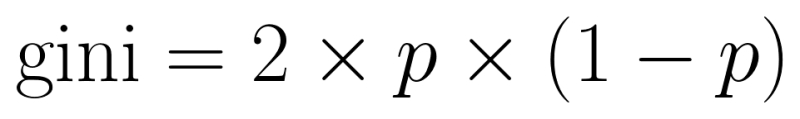

Here’s a graph of the gini impurity.

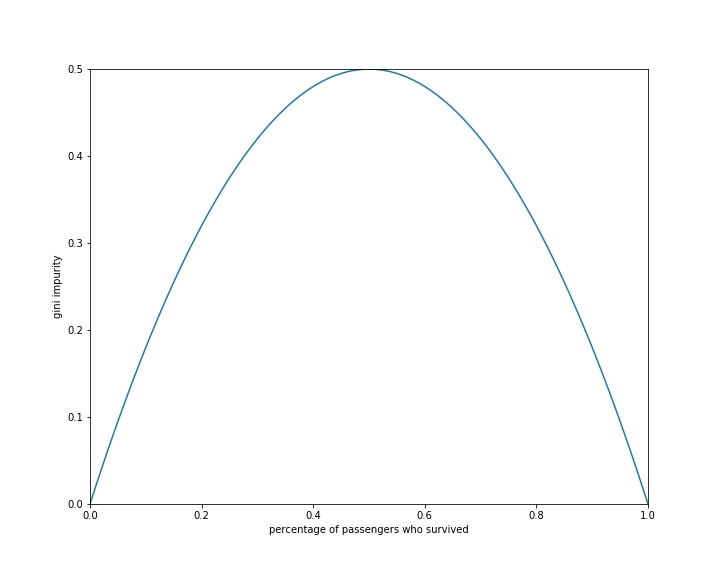

We can see that the maximum value is 0.5 when exactly 50% of the passengers in the set survived. If all the passengers survived or didn’t survive (percent is 0 or 1), then the value is 0.

Let’s calculate the gini impurity for our examples from the previous part. First we had a split on Age<=30 and Age>30. Let’s calculate the gini impurities of the two sets that we create.



On the left, for the passengers with Age<=30, let’s first calculate the percent of passengers who survived:

Percent of passengers who survived = 197/(197+328) = 0.3752
Percent of passengers who didn’t survive = 1 - 0.375 = 0.6248

Now let’s use that to calculate the gini impurity:
2 * 0.3752 * 0.6248 = 0.4689

We can see that this value is close to 0.5, the maximum value for gini impurity. This means that the set is impure.

Now let’s calculate the gini impurity for the right side, passengers with Age>30.
2 * 145/(145+217) * 217/(145+217) = 0.4802

This value is also close to 0.5, so again we have an impure set.

Now let’s look at the gini values for the other split we tried, splitting on Sex.



On the left side, for female passengers, we calculate the following value for the gini impurity.
2 * 233/(233+81) * 81/(233+81) = 0.3828

On the right side, for male passengers, we get the following value.
2 * 109/(109+464) * 464/(109+464) = 0.3081

Both of these values are smaller than the gini values for splitting on Age, so we determine that splitting on the Sex feature is a better choice.

Right now we have two values for each potential split. The information gain will be a way of combining them into a single value.

#### Entropy

Entropy is another measure of purity. It will be a value between 0 and 1 where 1 is completely impure (50% survived and 50% didn’t survive) and 0 is completely pure (100% the same class).

The formula for entropy comes from physics. p again is the percent of passengers who survived.

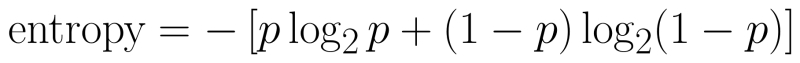

Here’s a graph of the entropy function.

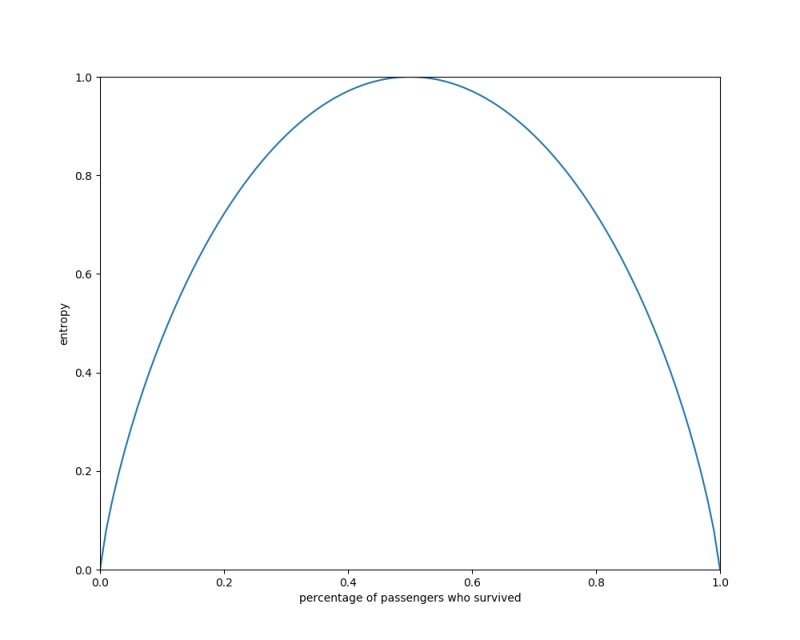

You can see it has a similar shape to the gini function. Like the gini impurity, the maximum value is when 50% of the passengers in our set survived, and the minimum value is when either all or none of the passengers survived. The shape of the graphs are a little different. You can see that the entropy graph is a little fatter.

Now let’s calculate the entropy values for the same two potential splits.

On the left (Age<=30):
p = 197/(197+328) = 0.3752

Entropy = -(0.375 * log(0.375) + (1-0.375) * log(1-0.375)) = 0.9546

And on the right (Age>30):
p = 145/(145+217) = 0.4006

Entropy =  -(0.401 * log(0.401) + (1-0.401) * log(1-0.401)) =  0.9713

These values are both close to 1, which means the sets are impure.

Now let’s do the same calculate for the split on the Sex feature.

On the left (female):
p = 233/(233+81) = 0.7420

Entropy = -(p * log(p) + (1-p) * log(1-p)) = 0.8237

And on the right (male):
p = 109/(109+464) = 0.1902

Entropy =  -(p * log(p) + (1-p) * log(1-p)) = 0.7019

You can see that these entropy values are smaller than the entropy values above, so this is a better split.

It’s not obvious whether gini or entropy is a better choice. It often won’t make a difference, but you can always cross validate to compare a Decision Tree with entropy and a Decision Tree with gini to see which performs better.

#### Information Gain

Now that we have a way of calculating a numerical value for impurity, we can define **information gain**.

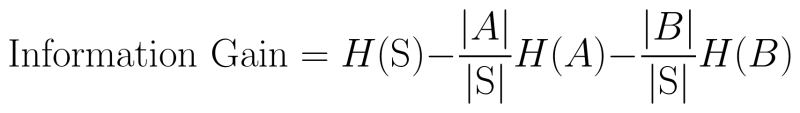

H is our impurity measure (either Gini impurity or entropy). S is the original dataset and A and B are the two sets we’re splitting the dataset S into. In the first example above, A is passengers with Age<=30 and B is passengers with Age>30. In the second example, A is female passengers and B is male passengers. |A| means the size of A.

Let’s calculate this value for our two examples. Let’s use Gini impurity as our impurity measure.

We’ve already calculated most of the Gini impurity values, though we need to calculate the Gini impurity of the whole set. There are 342 passengers who survived and 545 passengers who didn’t survive, out of a total of 887 passengers, so the gini impurity is as follows:

Gini = 2 * 342/887 * 545/887 = 0.4738

Again, here’s the first potential split.


Note that we have 197+328=525 passengers on the left (Age<=30) and 145+217=362 passengers on the right (Age>30). Thus, pulling in the gini impurity values that we calculated before, we get the following information gain:

Information gain = 0.4738 - 525/887 * 0.4689 - 362/887 * 0.4802 = 0.0003 # 0.4689 & 0.4802 are gini impurities calculated earlier

This value is very small meaning we gain very little from this split.

Now let’s calculate the information gain for splitting on Sex.

We have 233+81=314 passengers on the left (female) and 109+464=573 passengers on the right (male). Here is the information gain:

Information gain = 0.4738 - 314/887 * 0.3828 - 573/887 * 0.3081 = 0.1393 # 0.3828 & 0.3081 are gini impurities calculated earlier

Thus we can see that the information gain is much better for this split. Therefore, splitting on Sex is a much better choice when building our decision tree than splitting on Age with threshold 30.
The work we did was just to compare two possible splits. We’ll need to do the same calculations for every possible split in order to find the best one. Luckily we don’t have to do the computations by hand!

### 4.3 Predicting with a Decision Tree

#### Decision Tree Diagram

Let’s look at an example Decision Tree for the Titanic dataset. Within each internal node, we have the feature and threshold to split on, the number of samples and the distribution of the sames (# didn’t survived vs survived).

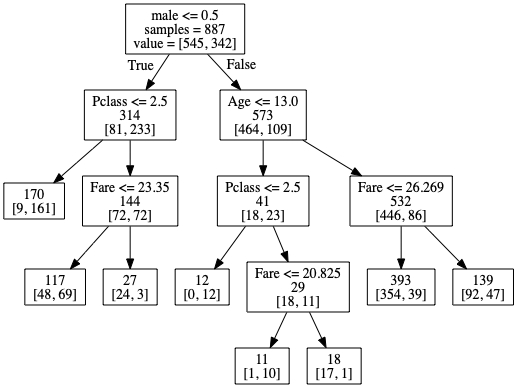

To interpret this, let’s start by looking at the root node. It says:

male <= 0.5
samples = 887
value = [545, 342]

This means that the first split will be on the male column. If the value is <=0.5 (meaning the passenger is female) we go to the left child and if the value is >0.5 (meaning the passenger is male) we go to the right child.

There are 887 datapoints to start and 545 are negative cases (didn’t survive) and 342 are positive (did survive).

If you look at the two children of the root node, we can see how many datapoints were sent each way based on splitting on Sex. There are 314 female passengers in our dataset and 573 male passengers.

You can see that the second split for female passengers is different from the second split for male passengers.
This diagram was created with graphviz, which we’ll learn how to use in a later lesson.

#### How to Make a Prediction

Let’s look at the same decision tree diagram again.


Let’s say we’d like to use this Decision Tree to make a prediction for a passenger with these values:

Sex: female
Pclass: 3
Fare: 25
Age: 30

We ask the question at each node and go to the left child if the answer is yes and to the right if the answer is no.

We start at the root node.

Is the value for the male feature <= 2.5? (This question could also be asked as "Is the passenger female?")
Since the answer is yes, we go to the left child.

Is the Pclass <= 0.5?
Since the answer is no, we go to the right child.

Is the Fare <= 23.35?
Since the answer is no, we go to the right child.

Now we’re at a leaf node. Here’s the path we took highlighted.



The leaf node that we end at has the following text:
27
[24, 3]

This means there are 27 datapoints in our dataset that also land at this leaf node. 24 of them didn’t survive and 3 of them survived. This means our prediction is that the passenger didn’t survive.

Because there are no rules as to how the tree is developed, the decision tree asks completely different questions of a female passenger than a male passenger.

### 4.4 Decision Trees in Scikit-learn

#### DecisionTreeClassifier Class

Just like with Logistic Regression, scikit-learn has a Decision Tree class. The code for building a Decision Tree model is very similar to building a Logistic Regression model. Scikit-learn did this intentionally so that it is easy to build and compare different models for the same dataset.

Here’s the import statement.

In [1]:
from sklearn.tree import DecisionTreeClassifier

Now we can apply the same methods that we used with the LogisticRegression class: fit (to train the model), score (to calculate the accuracy score) and predict (to make predictions).

We first create a DecisionTreeClassifier object.

In [2]:
model = DecisionTreeClassifier()

We do a train/test split using a random_state so that every time we run the code we will get the same split.

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

df=pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['Male_Female'] = df.Sex == "male"
df.drop('Sex',axis=1,inplace=True)
X = df.loc[:,"Pclass":"Male_Female"]
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [4]:
#Then we use the fit method to train the model.
model.fit(X_train, y_train)

DecisionTreeClassifier()

We can use the predict method to see what the model predicts. Here we can see the prediction for a male passenger in Pclass 3, who is 22 years old, has 1 sibling/spouse on board, has 0 parents/children on board, and paid a fare of 7.25.


In [5]:
print(model.predict([[3, True, 22, 1, 0, 7.25]]))

[0]


We see that the model predicts that the passenger did not survive. This is the same prediction that the Logistic Regression model gave.

Note that we have the same methods for a DecisionTreeClassifier as we did for a LogisticRegression object.

#### Scoring a Decision Tree Model

We can use the score and predict methods to get the accuracy, precision and recall scores.

In [6]:
from sklearn.metrics import precision_score, recall_score

print("accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))


accuracy: 0.7837837837837838
precision: 0.7386363636363636
recall: 0.7222222222222222


We can use k-fold cross validation to get an accurate measure of the metrics and compare the values with a Logistic Regression model. We use a random_state when creating the KFold object so that we will get the same results every time.
You can see that the accuracy and precision of the Logistic Regression model is higher, and the recalls of the two models are about the same.

The Logistic Regression model performs better, though we may still want to use a Decision Tree for its interpretability.

In [7]:
# check Accuracy Precision and Recall for titanic Dataset using logistic regression

from sklearn.linear_model import LogisticRegression

LReg = LogisticRegression(solver='liblinear')

LReg.fit(X_train,y_train)

print(LReg.predict([[3, True, 22, 1, 0, 7.25]]))

y_pred2 = LReg.predict(X_test)

print("Accuracy :",LReg.score(X_test,y_test))
print("Precision :",precision_score(y_test,y_pred2))
print("Recall :",recall_score(y_test,y_pred2))


from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(model, X, y, cv=5)
print('Decision Tree Cross-Validation Accuracy Score', dt_scores.mean())

lr_scores = cross_val_score(LReg, X, y, cv=5)
print('Logistic Regression Cross-Validation Accuracy Score', lr_scores.mean())


[0]
Accuracy : 0.7522522522522522
Precision : 0.7108433734939759
Recall : 0.6555555555555556
Decision Tree Cross-Validation Accuracy Score 0.7858757062146893
Logistic Regression Cross-Validation Accuracy Score 0.7903002602678855


#### Gini vs Entropy

The default impurity criterion in scikit-learn’s Decision Tree algorithm is the Gini Impurity. However, they’ve also implemented entropy and you can choose which one you’d like to use when you create the DecisionTreeClassifier object.

If you go to the docs, you can see that one of the parameters is criterion.

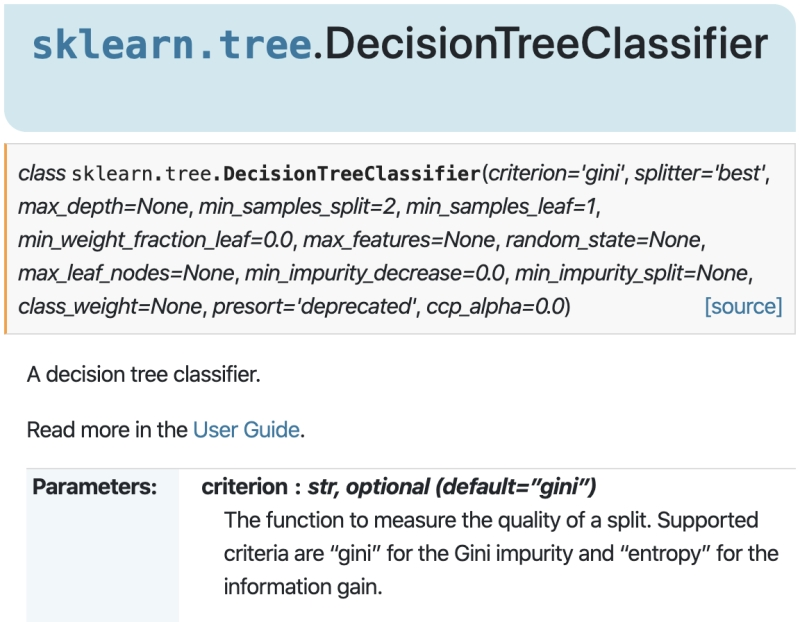

To build a Decision Tree that uses entropy, we’ll need to set the criterion parameter to entropy. Here’s the code for building a Decision Tree that uses entropy instead of the Gini Impurity.

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')

Now we can compare a Decision Tree using gini with a Decision Tree using entropy. We first create a k-fold split since when we’re comparing two models we want them to use the same train/test splits to be fair. Then we do a k-fold cross validation with each of the two possible models. We calculate accuracy, precision and recall for each of the two options.

Run this code to see the results:

In [24]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, random_state=0, shuffle=True)

for criterion in ['gini','entropy']:
    print('Model : ' + criterion)
    accuracy,precision,recall = [],[],[] # 5 fold hence 5 values then take mean
    model =  DecisionTreeClassifier(criterion=criterion)
    for train_index, test_index in kf.split(X):
        #print(train_index, test_index)
        X_train,y_train = X.values[train_index],y.values[train_index] # .values added as X,y is dataframe and converted to numpy
        X_test,y_test = X.values[test_index],y.values[test_index] # if we dont convert we get error
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy.append(model.score(X_test,y_test))
        precision.append(precision_score(y_test,y_pred))
        recall.append(recall_score(y_test,y_pred))
    print("Accuracy :",np.mean(accuracy))
    print("Precision :",np.mean(accuracy))
    print("Recall :",np.mean(accuracy))
    print()

Model : gini
Accuracy : 0.7722719482003428
Precision : 0.7722719482003428
Recall : 0.7722719482003428

Model : entropy
Accuracy : 0.7903066082650925
Precision : 0.7903066082650925
Recall : 0.7903066082650925



We see very little difference in the performance of Gini vs Entropy. This is expected as they aren’t really very different functions. It’s rare to find a dataset where the choice would make a difference.

#### Visualizing Decision Trees

If you want to create a png image of your graph, like the ones shown in this module, you can use scikit-learn's export_graphviz function.

###### method 1 : download as png image (install graphwiz package and also graphwiz software)

First we import it.

In [27]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

feature_names = ['Pclass', 'Male_Female']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

Format: "png" not recognized. Use one of:


CalledProcessError: Command '['dot', '-Tpng', '-O', 'tree']' returned non-zero exit status 1. [stderr: b'Format: "png" not recognized. Use one of:\r\n']

### method 2: just visualize

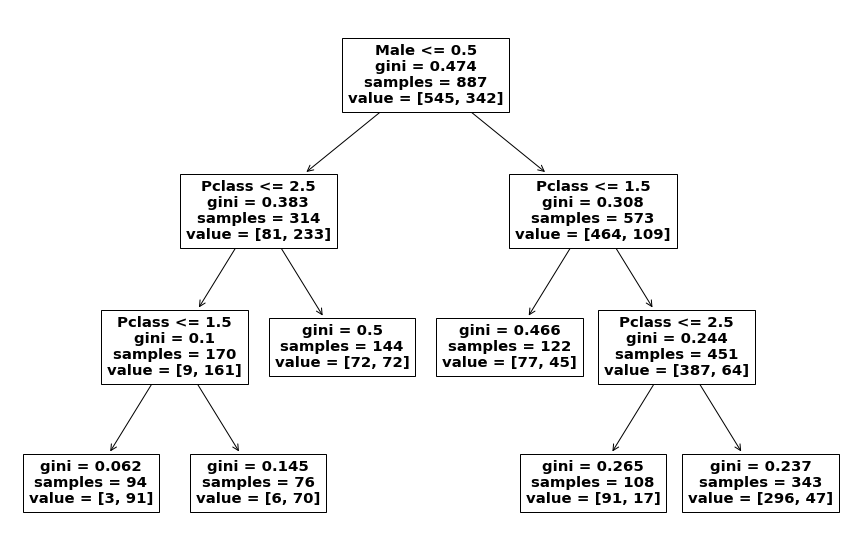

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['Male'] = df['Sex'] == 'male'
feature_names = ['Pclass', 'Male']
X = df[feature_names].values
y = df['Survived'].values
dt = DecisionTreeClassifier()
dt.fit(X, y)
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=feature_names)
plt.show()

### 4.5 Overfitting in Decision Trees

#### Tendency to Overfit

Recall that overfitting is when we do a good job of building a model for the training set, but it doesn’t perform well on the test set. Decision Trees are incredibly prone to overfitting. Since they can keep having additional nodes in the tree that split on features, the model can really dig deep into the specifics of the training set. Depending on the data, this might result in a model that doesn’t capture the true nature of the data and doesn’t generalize.

Maybe we just have a single datapoint that goes to a leaf node. It might not make sense to have that additional split.

Let’s look at a diagram of a Decision Tree for the Titanic dataset. This is the resulting tree when we build a Decision Tree with scikit-learn on the entire dataset. We’re just looking at a portion of the Decision Tree since it’s so large. We’ve highlighted a particular path of interest.


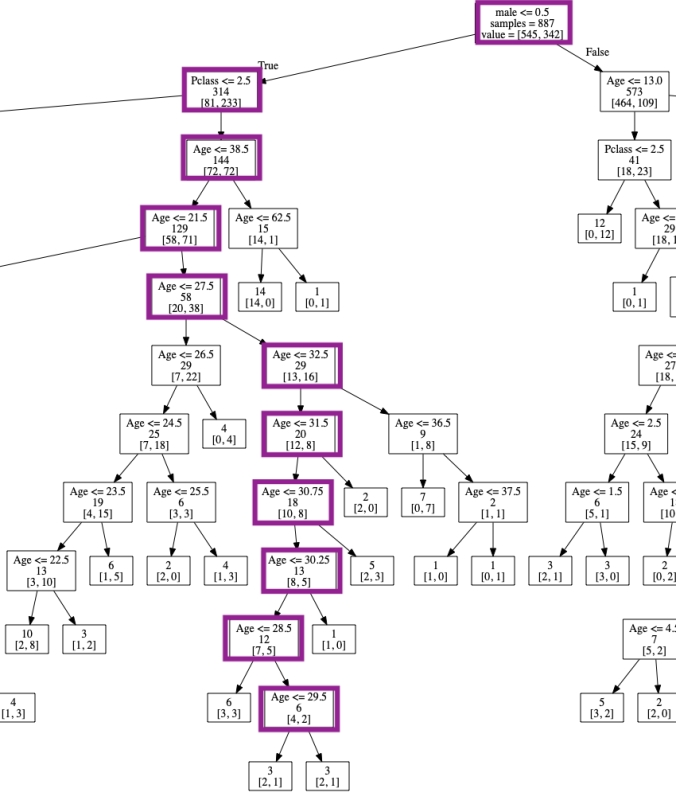

If you follow the highlighted path, you’ll see that we split on Sex, Pclass, and then split on Age 9 times in a row with different thresholds. This results in a graph that’s very nitpicky about age. A female passenger in Pclass 3 of age 31 goes to a different leaf node than a similar passenger of age 30.5 or 30 or 29. The model predicts that a female passenger age 35 survives, age 32 doesn’t survive, age 31 survives, and age 30 doesn’t survive. This is probably too fine-grained and is giving single datapoints from our dataset too much power. You can see that the leaf nodes all have few datapoints and often only one.
If you let a Decision Tree keep building, it may create a tree that’s overfit and doesn’t capture the essence of the data.

#### Pruning

In order to solve these issues, we do what’s called pruning the tree. This means we make the tree smaller with the goal of reducing overfitting.

There are two types of pruning: pre-pruning & post-pruning. In pre-pruning, we have rules of when to stop building the tree, so we stop building before the tree is too big. In post-pruning we build the whole tree and then we review the tree and decide which leaves to remove to make the tree smaller.

The term pruning comes from the same term in farming. Farmers cut off branches of trees and we are doing the same to our decision tree.

#### Pre-pruning

We’re going to focus on pre-pruning techniques since they are easier to implement. We have a few options for how to limit the tree growth. Here are some commonly used pre-pruning techniques:
• Max depth: Only grow the tree up to a certain depth, or height of the tree. If the max depth is 3, there will be at most 3 splits for each datapoint.
• Leaf size: Don’t split a node if the number of samples at that node is under a threshold
• Number of leaf nodes: Limit the total number of leaf nodes allowed in the tree

Pruning is a balance. For example, if you set the max depth too small, you won’t have much of a tree and you won’t have any predictive power. This is called underfitting. Similarly if the leaf size is too large, or the number of leaf nodes too small, you’ll have an underfit model.

There’s no hard science as to which pre-pruning method will yield better results. In practice, we try a few different values for each parameter and cross validate to compare their performance.

### 4.6 Pruning your Decision Tree in Scikit-learn

#### Pre-pruning Parameters

Scikit-learn has implemented quite a few techniques for pre-pruning. In particular, we will look at three of the parameters: max_depth, min_samples_leaf, and max_leaf_nodes. Look at the docs for Decision Trees to find full explanations of these three parameters.

Prepruning Technique 1: Limiting the depth

We use the max_depth parameter to limit the number of steps the tree can have between the root node and the leaf nodes.

Prepruning Technique 2: Avoiding leaves with few datapoints

We use the min_samples_leaf parameter to tell the model to stop building the tree early if the number of datapoints in a leaf will be below a threshold.

Prepruning Technique 3: Limiting the number of leaf nodes

We use max_leaf_nodes to set a limit on the number of leaf nodes in the tree.

Here’s the code for creating a Decision Tree with the following properties:
• max depth of 3
• minimum samples per leaf of 2
• maximum number of leaf nodes of 10

In [29]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)

You can now train the model and test it as we’ve done before.

You can use as many or as few of the parameters as you’d like.

To determine the best values for the pre-pruning parameters, we’ll use cross validation to compare several potential options.

#### Grid Search

We’re not going to be able to intuit best values for the pre-pruning parameters. In order to decide on which to use, we use cross validation and compare metrics. We could loop through our different options like we did in the Lesson on Decision Trees in Scikit-learn, but scikit-learn has a grid search class built in that will do this for us.

The class is called GridSearchCV. We start by importing it.

In [30]:
from sklearn.model_selection import GridSearchCV

GridSearchCV has four parameters that we’ll use:
1. The model (in this case a DecisionTreeClassifier)
2. Param grid: a dictionary of the parameters names and all the possible values
3. What metric to use (default is accuracy)
4. How many folds for k-fold cross validation

Let’s create the param grid variable. We’ll give a list of all the possible values for each parameter that we want to try.

In [35]:
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}

# Now we create the grid search object. We’ll use the above parameter grid, 
# set the scoring metric to the F1 score, and do a 5-fold cross validation.

dt = DecisionTreeClassifier()
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)

# Now we can fit the grid search object. This can take a little time to run as it’s trying every possible 
# combination of the parameters.
gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 15, 25],
                         'max_leaf_nodes': [10, 20, 35, 50],
                         'min_samples_leaf': [1, 3]},
             scoring='f1')

Since we have 3 possible values for max_depth, 2 for min_samples_leaf and 4 for max_leaf_nodes, we have 3 * 2 * 4 = 24 different combinations to try:

max_depth: 5, min_samples_leaf: 1, max_leaf_nodes: 10

max_depth: 15, min_samples_leaf: 1, max_leaf_nodes: 10

max_depth: 25, min_samples_leaf: 1, max_leaf_nodes: 10

max_depth: 5, min_samples_leaf: 3, max_leaf_nodes: 10

We use the best_params_ attribute to see which model won.

In [36]:
print("best params:", gs.best_params_)
# best parameters: {'max_depth': 15, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}

best params: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}



Thus we see that the best model has a maximum depth of 15, maximum number of leaf nodes as 35 and minimum samples per leaf of 1.

The best_score_ attribute tells us the score of the winning model.

In [37]:
print("best score:", gs.best_score_)
# best score: 0.775712742630669

best score: 0.6506779917168288


There are often a few models that have very similar performance. If you run this multiple times you might get slightly different results depending on the randomness of how the points are distributed among the folds. Generally if we have multiple models with comparable performance, we’d choose the simpler model.

### 4.7 Decision Tree Pros and Cons

#### Computation

When talking about how much computation is required for a machine learning algorithm, we separate it into two questions: how much computation is required to build the model and how much is required to predict.

A decision tree is very computationally expensive to build. This is because at every node we are trying every single feature and threshold as a possible split. We have to calculate the information gain of each of these possible splits each time. This is computationally very expensive.

Predicting with a decision tree on the other hand, is computational very inexpensive. You just need to ask a series of yes/no questions about the datapoint to get to the prediction.

Generally we care much more about the computation time for prediction than training. Predictions often need to happen in real time while a user is waiting for a result.

#### Performance

Decision Trees can perform decently well depending on the data, though as we have discussed, they are prone to overfitting. Since a leaf node can have just one datapoint that lands there, it gives too much power to individual datapoints.

To remedy the overfitting issues, decision trees generally require some tuning to get the best possible model. Pruning techniques are used to limit the size of the tree and they help mitigate overfitting.
Decision Trees often take work to perform on par with how other models perform with no tuning.

#### Interpretability

The biggest reason that people like choosing decision trees is because they are easily interpretable. Depending on what you’re building a model for, you might need to give a reason why you made a certain prediction. A non-technical person can interpret a Decision Tree so it’s easy to give an explanation of a prediction.

This particularly comes into play in legal situations. Say you are a bank and have a model to predict whether a person should be given a loan or not. It is important to be able to explain why the model made the decision, otherwise you could hide discriminatory practices within the model.
Interpretability is the biggest advantage of Decision Trees. It will depend on the situation whether this is important for your problem.

#### Extra Info's

the number "2" doing in the formula for "gini impurity"?
It basically refers to the number of classes in our classification. Here we have only two classes:
Survived and Didn't survive. 

Notice that the log in your calculator is actually log10 while the formula for entropy is in log₂.

If your calculator is missing it, you can simply divide the result with log(2). 
I.e., whenever you calculate log in any base, divide finally with log 2 to convert it to log₂ result.
Or simply use python's math.log(number,2) or math.log2(number) or wolframalpha :)

import math
def entropy(s, ns, msg):
    p = s / (s + ns)
    return -(p * math.log2(p) + (1 - p) * math.log2(1 - p)), msg

#### example for left A (by Age), survived 197, died 328
print(entropy(197, 328, "A left"))
#### (0.9546092964627467, 'A left')